<a href="https://colab.research.google.com/github/ndcastillo/inferential-statistics-DS-AI/blob/main/Varianza_y_Desviaci%C3%B3n_Estandar_muestral_en_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Librerias de Interes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Cargamos el archivo a analizar

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
names = ['sepal-length','sepal-width','petal-length','petal-width','class']
iris = pd.read_csv(url, names=names)

In [ ]:
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


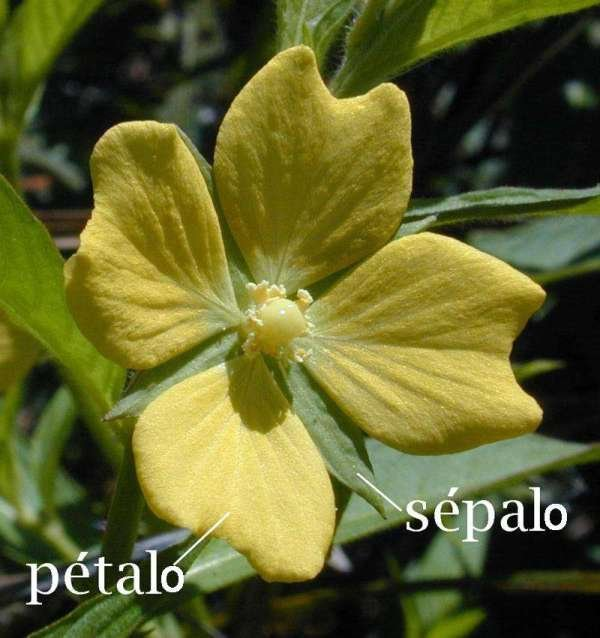

(array([ 1.,  3.,  1.,  4.,  2.,  5.,  6., 10.,  9.,  4.,  1.,  6.,  7.,
         6.,  8.,  7.,  3.,  6.,  6., 13.,  0.,  7.,  5.,  2., 11.,  0.,
         4.,  2.,  0.,  4.,  0.,  1.,  1.,  4.,  0.,  1.]),
 array([4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5,
        5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8,
        6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9]),
 <a list of 36 Patch objects>)

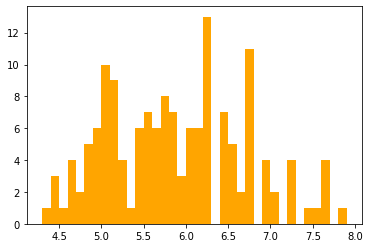

In [ ]:
plt.hist(iris['sepal-length'],color='orange',bins = int(180/5))

**Gráfico de Kernel Density**

Se desea modelar el grafico como una distribución normal.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


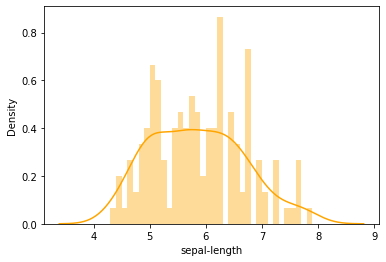

In [ ]:
sns.distplot(iris['sepal-length'],hist=True,kde=True,bins=int(180/5),color='orange')

## Poblacional

### Cálculo de la Varianza
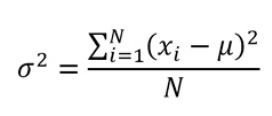

Utilizaremos los metodos de pandas para el calculo de la variación y desviación estandar, para ello tendremos que observar el metodo `.var()` y `std()` tienen un parametro `ddof`, el cual sera el divisor `N-ddof`, por defecto este parametro sera 1, como la formula tanto de la desviación estandar como varianza poblacional el divisor es N, entonces debemos acotar el colocar un `ddof=0` en el parametro que le pasemos al metodo.

In [ ]:
iris['sepal-length'].var(ddof=0)

0.6811222222222223

### Cálculo de la desviación Estandar

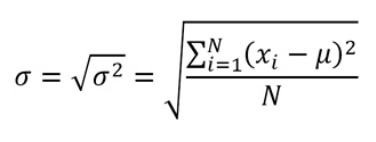

In [ ]:
iris['sepal-length'].std(ddof=0)

0.8253012917851409

In [ ]:
iris['sepal-length'].mean()

5.843333333333334

### Calculo del coeficiente de variación
$$C_V = \frac{\sigma}{x} *100%$$

- Si $C_V$ es menor o igual al 30%, se dice que la media aritmetica es representativa del conjunto de datos, y se llama al conjunto de datos como **Homogeneo**. 
- Por otro lado, si $C_V$ es mayor al 30% la media no sea representativa en el conjunto de datos, y resultara en un conjunto **Heterogeneo**

In [ ]:
coef_var = iris['sepal-length'].std() / iris['sepal-length'].mean()

if (coef_var <= 0.3):
  print(str(coef_var.round(2))+'\n'+'La media es representativa y se trata de un conjunto Homogeneo')
else:
  print('La media no es representativa y se trata de un conjunto Heterogeneo')

0.14
La media es representativa y se trata de un conjunto Homogeneo


## Creación de una muestra con el muestreo aleatorio simple

In [ ]:
muestra = iris.sample(frac=0.5)

### Calculo de la variacion muestral

In [ ]:
muestra['sepal-length'].var()

0.6721549549549551

### Calculo de la desviación estandar

In [ ]:
muestra['sepal-length'].std()

0.8198505686739231

In [ ]:
muestra['sepal-length'].mean()

5.839999999999999

## Solución al Reto planteado

### Poblacional

Si analizamos los parametros del set de datos, nos encontramos con 4 variables agrupadas en 4 categorias o clases que son Iris-Sentosa, Iris-VersiColor, y Iris-Virginica. Podemos obtener la grafica de la densidad de kernel a traves de la libreria seaborn y utilizando el metodo `kdeplot`, usando los paramateros de `data=iris` y seleccionado la variable a analizar.

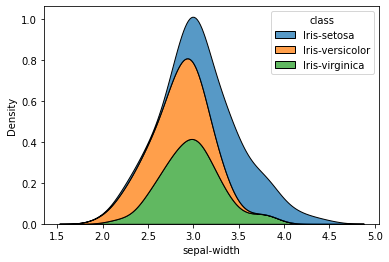

In [ ]:
sns.kdeplot(data=iris,x='sepal-width',hue='class',fill=True,multiple='stack')

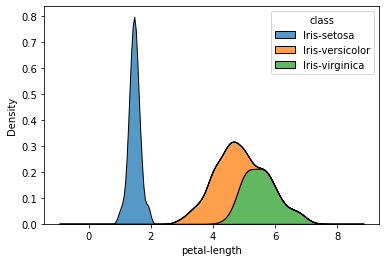

In [ ]:
sns.kdeplot(data=iris,x='petal-length',hue='class',fill=True,multiple='stack')

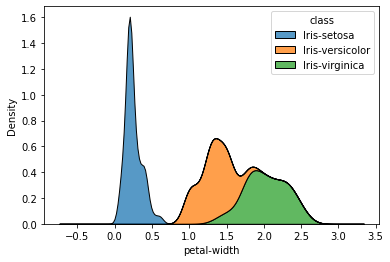

In [ ]:
sns.kdeplot(data=iris,x='petal-width',hue='class',fill=True,multiple='stack')

In [ ]:
# Parametros carateristicos de sepal width
par_sepal_width = [iris['sepal-width'].var(ddof=0), iris['sepal-width']
                   .std(ddof=0),iris['sepal-width'].mean()]

print(par_sepal_width)

# Parametros carateristicos de petal length
par_petal_length = [iris['petal_length'].var(ddof=0), iris['petal-length']
                   .std(ddof=0),iris['petal-length'].mean()]

print(par_petal_length)

# Parametros carateristicos de petal width
par_petal_width = [iris['petal_width'].var(ddof=0), iris['petal-width']
                   .std(ddof=0),iris['petal-width'].mean()]

print(par_petal_width)

[0.18675066666666668, 0.4321465800705435, 3.0540000000000003]
[3.092424888888889, 1.7585291834055212, 3.758666666666666]
[0.5785315555555555, 0.7606126185881716, 1.1986666666666668]


### Muestral

### Muestreo Aleatorio Simple

In [ ]:
muestras_sepal_width = iris['sepal-width'].sample(frac=0.5)
muestras_petal_length = iris['petal-length'].sample(frac=0.5)
muestras_petal_width = iris['petal-width'].sample(frac=0.5)

### Calculo de Varianza, Desviación y Media
Para este calculo se recuerda que ya no es necesario enviar el parametro `ddof=0`

In [ ]:
# Parametros carateristicos de sepal width
par_sepal_width_muestral = [muestras_sepal_width.var(), muestras_sepal_width.std(),muestras_sepal_width.mean()]

print(par_sepal_width_muestral)

# Parametros carateristicos de petal length
par_petal_length_muestral = [muestras_petal_length.var(), muestras_petal_length
                   .std(),muestras_petal_length.mean()]

print(par_petal_length_muestral)

# Parametros carateristicos de petal width
par_petal_width_muestral = [muestras_petal_width.var(), muestras_petal_width
                   .std(),muestras_petal_width.mean()]

print(par_petal_width_muestral)

[0.17242522522522521, 0.41524116513807396, 2.9693333333333336]
[3.1941441441441434, 1.7872168710439547, 3.8333333333333335]
[0.6129657657657658, 0.7829213024089751, 1.1973333333333334]
